# Juntar y concatenar dataframes 

In [8]:
import pandas as pd
df_movies = pd.read_csv('IMDb movies.csv',low_memory=False)
df_ratings = pd.read_csv('IMDb ratings.csv')

In [9]:
df_movies.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language', 'director', 'writer',
       'production_company', 'actors', 'description', 'avg_vote', 'votes',
       'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore',
       'reviews_from_users', 'reviews_from_critics'],
      dtype='object')

In [10]:
df_movies = df_movies[['imdb_title_id','title','year','genre','country']]

In [11]:
df_movies

,imdb_title_id,title,year,genre,country
0,tt0000009,Miss Jerry,1894,Romance,USA
1,tt0000574,The Story of the Kelly Gang,1906,"Biography, Crime, Drama",Australia
2,tt0001892,Den sorte drøm,1911,Drama,"Germany, Denmark"
3,tt0002101,Cleopatra,1912,"Drama, History",USA
4,tt0002130,L'Inferno,1911,"Adventure, Drama, Fantasy",Italy
...,...,...,...,...,...
85850,tt9908390,Le lion,2020,Comedy,"France, Belgium"
85851,tt9911196,De Beentjes van Sint-Hildegard,2020,"Comedy, Drama",Netherlands
85852,tt9911774,Padmavyuhathile Abhimanyu,2019,Drama,India
85853,tt9914286,Sokagin Çocuklari,2019,"Drama, Family",Turkey


In [12]:
df_ratings.columns

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [15]:
 df_ratings = df_ratings[['imdb_title_id','total_votes','mean_vote']]

In [16]:
df_movies
df_ratings

,imdb_title_id,total_votes,mean_vote
0,tt0000009,154,5.9
1,tt0000574,589,6.3
2,tt0001892,188,6.0
3,tt0002101,446,5.3
4,tt0002130,2237,6.9
...,...,...,...
85850,tt9908390,398,5.5
85851,tt9911196,724,7.9
85852,tt9911774,265,7.8
85853,tt9914286,194,9.4


## concat() 

#### concatenacion vertical 

In [17]:
df1 = pd.DataFrame({'id':['A','B','C','D'],'age':[30,23,25,22]})
df2 = pd.DataFrame({'id':['E','F','G','F'],'age':[40,21,19,24]})

In [18]:
df1

,id,age
0,A,30
1,B,23
2,C,25
3,D,22


In [19]:
df2

,id,age
0,E,40
1,F,21
2,G,19
3,F,24


In [24]:
# concatenemos sin index repetidos y ordenado
pd.concat([df1,df2],axis=0,ignore_index=True, sort=True)

,age,id
0,30,A
1,23,B
2,25,C
3,22,D
4,40,E
5,21,F
6,19,G
7,24,F


##  Ejercicio

In [32]:
# extraer 50% de muestra del dataframe original 
df_samples = df_movies.sample(frac=0.5)

In [35]:
# shape
print(df_movies.shape)
print(df_samples.shape)

(85855, 5)
(42928, 5)


In [36]:
# concatenar verticalmente df_movies y df_samples
df_concat_vertical = pd.concat([df_samples,df_movies],axis=0,ignore_index=True, sort=True)

In [37]:
df_concat_vertical.shape

(128783, 5)

# concat()  

#### concatenar horizontalmente 

In [40]:
df1 = pd.DataFrame({'id':['A','B','C','D'],'age':[30,23,25,22]})
df2 = pd.DataFrame({'job':['Doctor','Statistician',
                            'Accountant','Developper']})

In [41]:
df1

,id,age
0,A,30
1,B,23
2,C,25
3,D,22


In [42]:
df2

,job
0,Doctor
1,Statistician
2,Accountant
3,Developper


In [43]:
pd.concat([df1,df2],axis=1)

,id,age,job
0,A,30,Doctor
1,B,23,Statistician
2,C,25,Accountant
3,D,22,Developper


# joins 

## Inner Join : la data en comun entre varios conjuntos de datos 

#### df1.merge(df2,on="id",how="inner") : para hacer intercepciones 
#### df2: dataframe con el cual se quiere hacer el inner join, 
#### on: indica la columna en comun.
#### how: como queremos q sea el join.
#### lo que obtenemos como resultado es solamente la data en comun

In [65]:
df1 = pd.DataFrame({'id':['A','B','C','D'],'age':[30,23,25,22]})
df2 = pd.DataFrame({'id':['C','D','E','F'],
                    'job':['Doctor','Statistician',
                            'Accountant','Developper']})

In [66]:
df1.head(3)

,id,age
0,A,30
1,B,23
2,C,25


In [67]:
df2.head(3)

,id,job
0,C,Doctor
1,D,Statistician
2,E,Accountant


In [69]:
df_inner_join = df1.merge(df2,on='id',how='inner')

In [70]:
print(df1.shape)
print(df2.shape)
print(df_inner_join.shape)

(4, 2)
(4, 2)
(2, 3)


## Full join : se considera todo el espacio y tamb lo que tienen en comun

In [71]:
df1 = pd.DataFrame({'id':['A','B','C','D'],'age':[30,23,25,22]})
df2 = pd.DataFrame({'id':['C','D','E','F'],
                    'job':['Doctor','Statistician',
                            'Accountant','Developper']})

In [73]:
df_full_join = df1.merge(df2,on='id',how='outer')

In [74]:
df_full_join.columns

Index(['id', 'age', 'job'], dtype='object')

In [75]:
df_full_join

,id,age,job
0,A,30.0,NaN
1,B,23.0,NaN
2,C,25.0,Doctor
3,D,22.0,Statistician
4,E,NaN,Accountant
5,F,NaN,Developper


In [76]:
print(df1.shape)
print(df2.shape)
print(df_full_join.shape)

(4, 2)
(4, 2)
(6, 3)


## (Exclusive) Full join : no se consideran los datos en comun entre conjuntos de datos, mas bien los exclusivos

In [77]:
df1 = pd.DataFrame({'id':['A','B','C','D'],'age':[30,23,25,22]})
df2 = pd.DataFrame({'id':['C','D','E','F'],
                    'job':['Doctor','Statistician',
                            'Accountant','Developper']})

In [80]:
df1.merge(df2,on='id',how='outer',
                                   indicator=True)

,id,age,job,_merge
0,A,30.0,NaN,left_only
1,B,23.0,NaN,left_only
2,C,25.0,Doctor,both
3,D,22.0,Statistician,both
4,E,NaN,Accountant,right_only
5,F,NaN,Developper,right_only


In [81]:
df1.merge(df2,on='id',how='outer',indicator=True).query(
    "_merge=='left_only' or _merge=='right_only'")

,id,age,job,_merge
0,A,30.0,NaN,left_only
1,B,23.0,NaN,left_only
4,E,NaN,Accountant,right_only
5,F,NaN,Developper,right_only


## left join : nos permite obtener valores los cuales se encuentran en una sola tabla e incluye los valores en comun con el otro conjunto

In [82]:
df1 = pd.DataFrame({'id':['A','B','C','D'],'age':[30,23,25,22]})
df2 = pd.DataFrame({'id':['C','D','E','F'],
                    'job':['Doctor','Statistician',
                            'Accountant','Developper']})

In [83]:
df1.merge(df2,on='id',how='left')

,id,age,job
0,A,30,NaN
1,B,23,NaN
2,C,25,Doctor
3,D,22,Statistician


## left join exclusivo : obtenemos los valores de una columna excluyendo a los comunes con otra columna 

In [87]:
df1.merge(df2,on='id',how='outer',indicator=True).query(
    "_merge=='left_only'")

,id,age,job,_merge
0,A,30.0,NaN,left_only
1,B,23.0,NaN,left_only


In [86]:
import matplotlib.pyplot as plt


In [98]:
df = df1.merge(df2,on='id',how='outer',indicator=True).query(
    "_merge=='left_only'")

<Axes: >

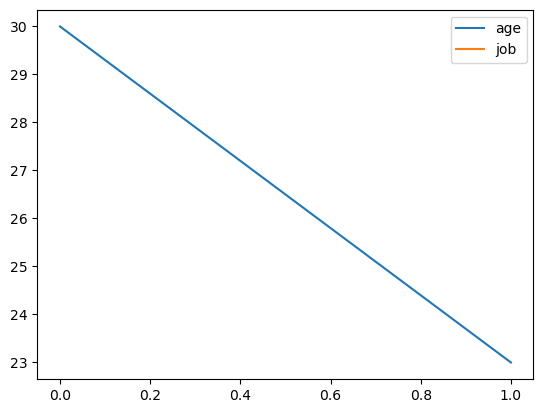

In [108]:
df.plot(kind='line')

In [113]:
df_age = df1.merge(df2,on='id',how='outer',indicator=True)

In [114]:
df_age

,id,age,job,_merge
0,A,30.0,NaN,left_only
1,B,23.0,NaN,left_only
2,C,25.0,Doctor,both
3,D,22.0,Statistician,both
4,E,NaN,Accountant,right_only
5,F,NaN,Developper,right_only


<Axes: >

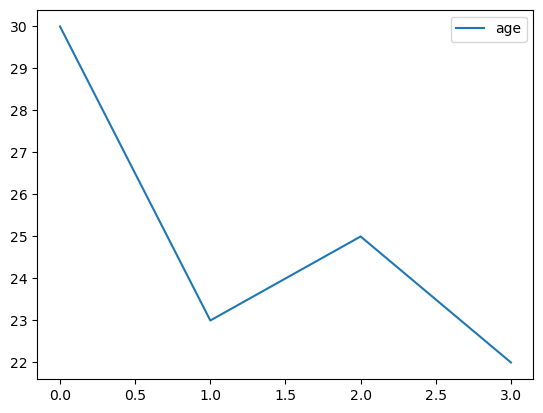

In [116]:
df_age.plot(kind='line')